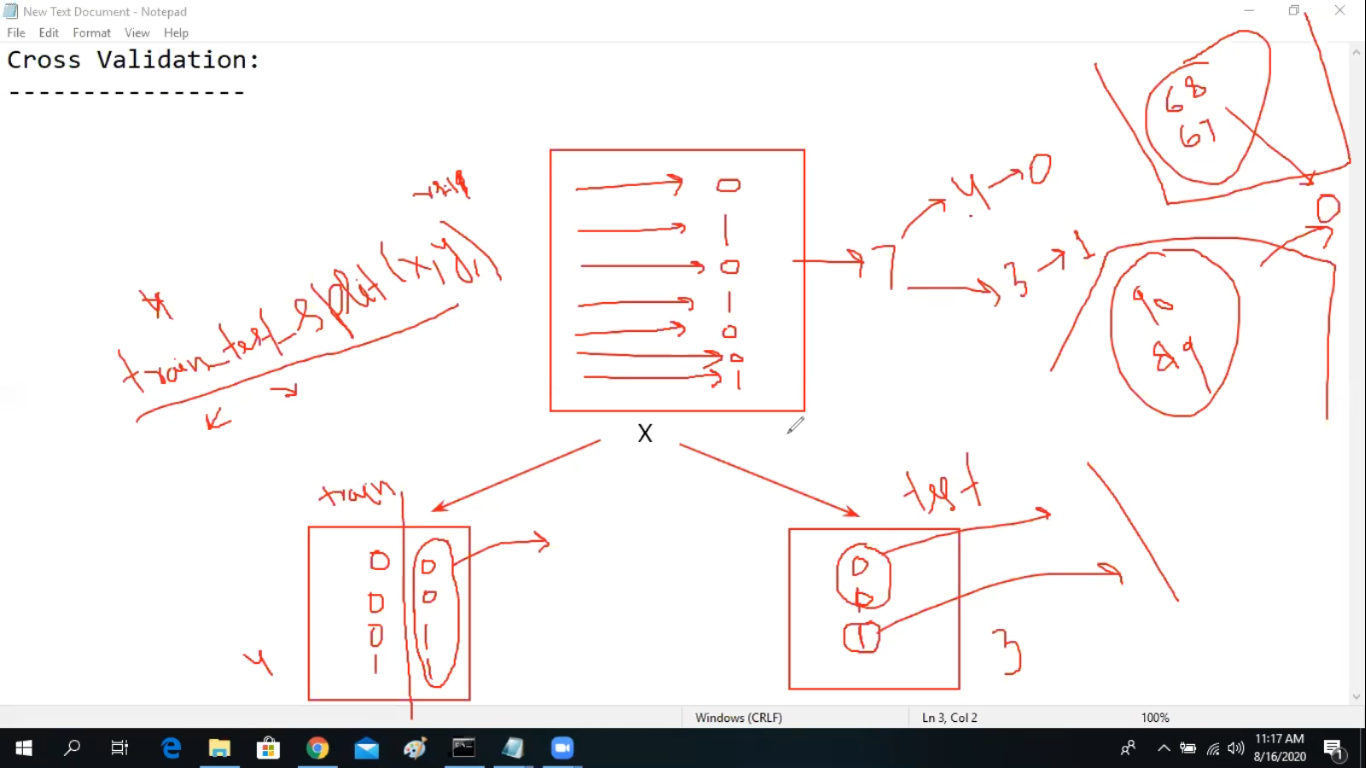

# How cross-validation is worked behind the scene

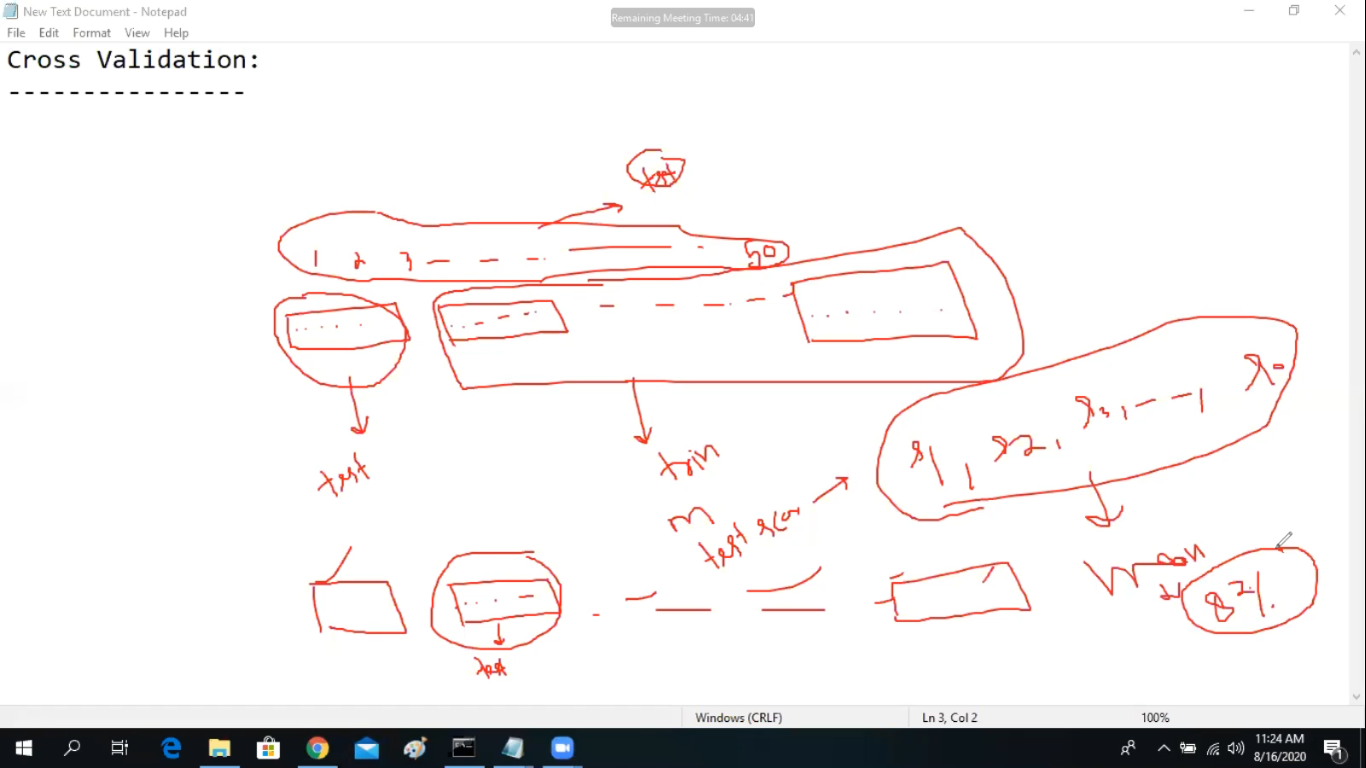

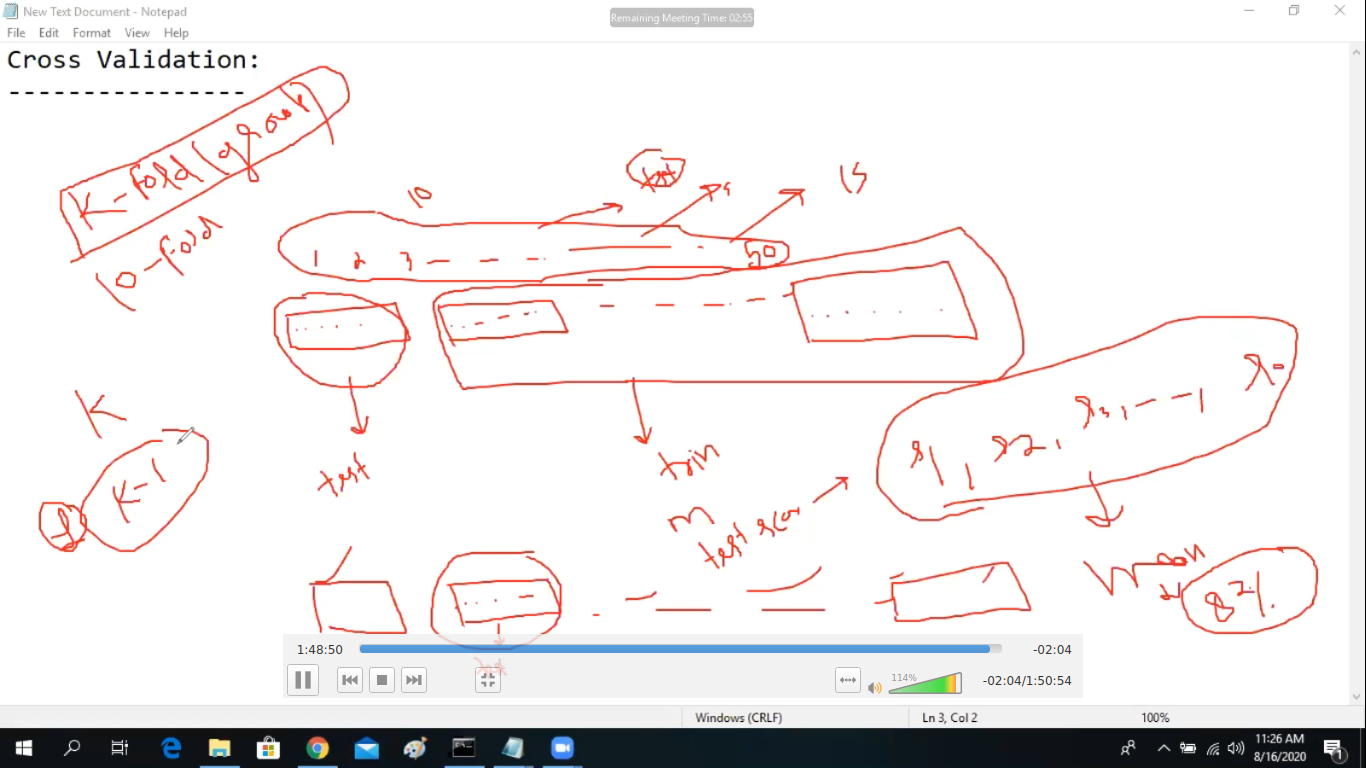

### decisionTreeClassifiere jyada tar classification ke liye use hota hai na ki regression ke liye

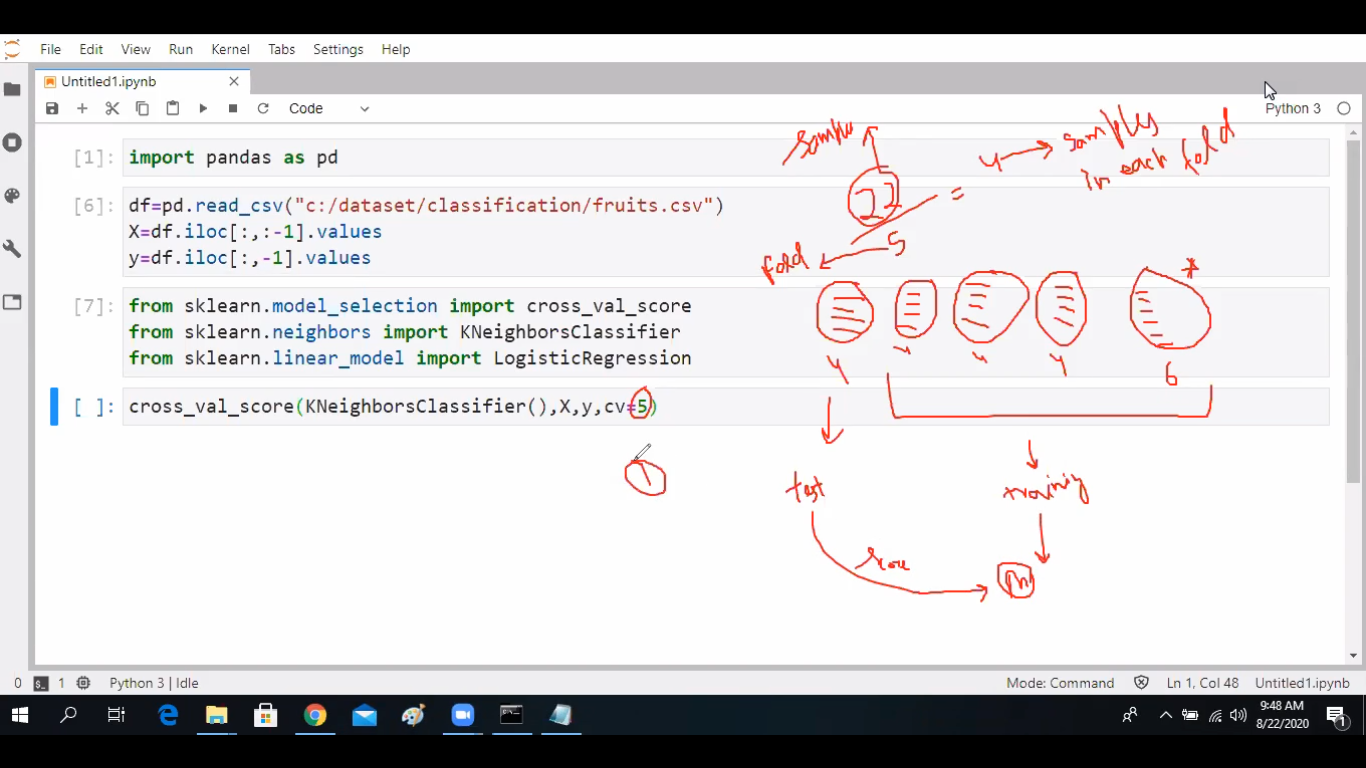

In [13]:
import pandas as pd 

In [14]:
df = pd.read_csv('/home/echelon/machine_learning_personal/machine learning/dataset/classification/fruits.csv')
df

,diameter,weight,FruitName
0,3.0,30,Banana
1,6.0,100,Apple
2,6.1,95,Apple
3,3.2,35,Banana
4,5.5,80,Apple
5,7.1,120,Banana
6,2.5,60,Banana
7,2.3,100,Banana
8,4.8,70,Apple
9,4.8,79,Apple


In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 

In [19]:
cross_val_score(KNeighborsClassifier(),X,y,cv=5)# it will return the score on the testing data for every fold/group of the data

/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

array([1. , 0.8, 0.5, 1. , 1. ])

In [21]:
cross_val_score(KNeighborsClassifier(),X,y,cv=5).mean()# to know the overall behaviour of model find the mean
# ye jo accuaracy aa rhi hai unseen data pe(y_test)

/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

0.86

In [23]:
cross_val_score(LogisticRegression(),X,y,cv=5).mean() # dono same score de rhe hain means ye dono ek hi jaisa behave kr rhe hai is data pe(fruits wale data pe)

0.86

In [30]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [35]:
boston = load_boston() 
X = boston.data 
y = boston.target 

print(cross_val_score(LinearRegression(),X,y,cv=5))
print(cross_val_score(Ridge(),X,y,cv=5)) 
print(cross_val_score(Lasso(),X,y,cv=5))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
[ 0.66089569  0.74094893  0.62923672  0.08530169 -0.17029513]
[0.56156843 0.63385562 0.33456629 0.35466066 0.27459294]


/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [39]:
boston = load_boston() 
X = boston.data 
y = boston.target 

print(f'LinearRegression() : {cross_val_score(LinearRegression(),X,y,cv=5).mean()}')
print(f'Ridge() : {cross_val_score(Ridge(),X,y,cv=5).mean()}') 
print(f'Lasso() : {cross_val_score(Lasso(),X,y,cv=5).mean()}') # Here Lasso is performing better ,ab hyper-tuning isi pe kro  
# cv ki value research ke hisab 5 se 10 ke beech rakhte hain 5 <= cv <= 10

LinearRegression() : 0.3532759243958772
Ridge() : 0.389217582410241
Lasso() : 0.4318487879265221


/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 